# 01-06 : Human Feedback

Improve the classifications with Human Feedback.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Markdown

In [102]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

## Data Load

In [7]:
# load the chatbot classifications
df_source = pd.read_parquet('../../data/interim/01-05_chatbot_classifications.parquet.gz')

# show the data loaded
print(df_source.shape)
display(df_source.head(3))

(235, 15)


,id,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion
3,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...
5,3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...
11,3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...


## Exploratory Data Analysis

### Reviews by Business

The bulk of the reviews are for Vodacom (85%), followed bny Telkom (12%). This might indicate that Vodacom might be the only telecommunications provider focussing on chatbot technology for customer service.

In [11]:
df_source.business_slug.value_counts(normalize=True)

business_slug
vodacom                           0.846809
telkom                            0.114894
mtn                               0.025532
cell-c                            0.008511
rain-internet-service-provider    0.004255
Name: proportion, dtype: float64

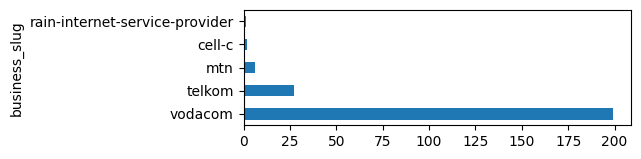

In [9]:
# the number of complaints by business
df_source.business_slug.value_counts().plot(kind='barh', figsize=(5, 1.5))
plt.show()

### Chatbot Classifications

There is a large number of classifications, and some of them are very similar. There is thus an opportunity to reduce the number of classifications by grouping similar classifications together and standardising the classification names.

In [18]:
# show the top 10 most common labels
df_source.chatbot_classification.value_counts().head(10)

chatbot_classification
Customer service                         70
Customer support                         20
Customer Service                         20
Customer Care                             9
Ineffective chatbot                       9
Customer Support                          8
Customer dissatisfaction with chatbot     8
Technical issue                           7
Poor performance                          4
Ineffective                               4
Name: count, dtype: int64

In [34]:
# show all the classifications
df_source.chatbot_classification \
    .str.lower() \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .sort_values('chatbot_classification')

,chatbot_classification,count
37,annoyance,1
51,annoying calls,1
11,billing,2
16,complaint,2
30,complaint about chatbot assistance,1
13,complaint about chatbot functionality,2
2,customer care,10
38,customer care assistance,1
8,customer care chatbot,3
43,customer complaint,1


### Complaint Service

Some of the services mentioned the telecommunications company name which is incorrect, there are also too many categories to be useful. Ideally these services should map to actual services offered in the tellecommunications industry.

In [40]:
# show the top 10 most common labels
df_source.complaint_service.value_counts().head(10)

complaint_service
Vodacom                  104
Telkom                    14
MTN                        4
Vodabucks                  3
Vodacom customer care      3
Call center                3
Vodabucks Store            2
Vodacom online deals       2
Contract cancellation      2
Tax invoice                2
Name: count, dtype: int64

In [42]:
# show all the classifications
df_source.complaint_service \
    .str.lower() \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .sort_values('complaint_service')

,complaint_service,count
24,,1
91,135,1
79,airtime,1
78,airtime purchase,1
56,app,1
...,...,...
30,vodocom,1
72,voice bundle,1
14,webmail7,1
95,whatsapp bundles,1


### Complaint Classification

In [37]:
# show the top 10 most common labels
df_source.complaint_classification.value_counts().head(10)

complaint_classification
Customer service         38
Customer Service         31
Service                  23
Billing                  22
Poor customer service    13
Poor service              8
Service complaint         6
Service issue             4
Fraud                     4
Technical issue           4
Name: count, dtype: int64

In [39]:
# show all the classifications
df_source.complaint_classification \
    .str.lower() \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .sort_values('complaint_classification')

,complaint_classification,count
31,,1
32,airtime issue,1
69,appalling service,1
19,bad service,2
58,bad services,1
...,...,...
24,unauthorized credit checks,1
43,unauthorized subscription,1
68,unreliable service provider,1
62,unwanted caller tune,1


### Export for Review

Export the data for manual human review.

In [71]:
df_source.to_excel('../../data/interim/01-06_human_feedback.xlsx', index=False)

Given the review, please provide a classification.

Schema:

Use the following JSON output schema:

```json
{
    main: string, // the main classification for the chatbot shortcoming
    secondary: string // the secondary classification
}
```

Guidelines:

- A review can have at most two categories describing the shortcomings of the chatbot.
- The classification must be domain specific to telecommunication providers.
- Examples of classification categories
    - understand customer request
    - unable to contact a human agent
    - lack functionality

```review
Tired of speaking to TOBI, we need humans	I bought WhatsApp bundles for R35 on the 13th July 2023, which have not been allocated till today the 20th, but i was rewarded with 3.5 Vodabucks. On the 14th I called customer service but was referred to TOBI the BOT, of which it was hard for TOBI to understand because he is an Automated Machine, I then asked to speak to a human, with no success. Sent an email to customer care, got a reference but no call back. I went to Sandton branch, but they could not help me because I bought the data online via capitec app. Can we please speak to humans, its really tiring not being able to express yourself. Kindly serve your customers well, this is really frustrating.
```

Given the review, please provide a classification.

Schema:

Use the following JSON output schema:

```json
{
    main: string, // the main classification for the chatbot shortcoming
    secondary: string // the secondary classification
}
```

Guidelines:

- A review can have at most two categories describing the shortcomings of the chatbot.
- The classification must be domain specific to telecommunication providers.
- Examples of classification categories:
    * understand customer request
    * unable to contact a human agent
    * difficult to contact a human agent
    * lack functionality

```review
Appalling service	MTN, in my experience, has to rate as probably the very worst service provider I have ever had the misfortune to deal with, and right up there with Telkom and ADT. Without going into specifics, because it would take too long, MTN, for me, incorporates huge difficulty in speaking to a human to start with, then it is almost impossible to speak to the right human amongst calls being misdirected, those on the receiving end having conflicting information or supplying no information, and then, after applying tenacity of an almost impossible degree, amongst dropped calls, to be told that someone would definitely come back to me as the problem has been escalated, and then deathly silence. Let's go 135 again and set aside a day, I say. After three hours I valiantly admit defeat. You win, MTN. I need to now extricate myself from a debit order and change service providers which should take possibly another two or three days of effort. However, MTN, you will receive the very worst feedback from me to everyone I know, unfortunately. I have no doubt that this email will either be ignored or I will get an AI bot asking me for my name and number and to explain my problem.
```

Given the review, please provide a classification.

Schema:

Use the following JSON output schema:

```json
{
    main: string, // the main classification for the chatbot shortcoming
    secondary: string // the secondary classification
}
```



Guidelines:

- A review can have at most two categories describing the shortcomings of the chatbot.
- If there is no secondary category indicating why the chatbot failed, indicate None
- The classification must be domain specific to telecommunication providers.

- Do not use classifications that are too specific, for example:
    * unable to receive purchased vouchers

- Examples of classification categories:
    * unable to understand customer request
    * unable to contact a human agent
    * difficult to contact a human agent
    * lack functionality

```review
Vodabucks is a ****!!!!	"Used their App to buy vouchers, my VodaBucks balance got deducted, and I never received my vouchers, speaking to this useless Tobi bot and 082135 has gotten me nowhere unfortunately

either refund my balance or send the vouchers please"
```

Given the review, please provide a classification.

Schema:

Use the following JSON output schema:

```json
{
    main: string, // the main classification for the chatbot shortcoming
    secondary: string // the secondary classification
}
```



Guidelines:

- A review can have at most two categories describing the shortcomings of the chatbot.
- If there is no secondary category indicating why the chatbot failed, indicate None
- The classification must be domain specific to telecommunication providers.
- The classification must relate specifically to a shortcoming with the chatbot, and not be a general classification for the customer review.

- Examples of classification categories:
    * unable to understand customer request
    * unable to contact a human agent
    * difficult to contact a human agent
    * lack functionality

```review
useless chatbot	Your Automated support desk is utter useless. I upgraded my vodacom contract in February and the new simcard is still offline. Your automated chatbot keeps going into a look asking if I want my latest account statement, or activate CLIP. I want neither. I need the new SIM card to be activated.
```

Given the review, please provide a classification.

Schema:

Use the following JSON output schema:

```json
{
    main: string, // the main classification for the chatbot shortcoming
    secondary: string // the secondary classification
}
```



Guidelines:

- A review can have at most two categories describing the shortcomings of the chatbot.
- If there is no secondary category indicating why the chatbot failed, indicate None
- The classification must be domain specific to telecommunication providers.
- The classification must relate specifically to a shortcoming with the chatbot, and not be a general classification for the customer review.

- Examples of classification categories:
    * unable to understand customer request
    * unable to contact a human agent
    * difficult to contact a human agent
    * lack functionality

```review
Data not loaded	Good evening..today I purchased 6 gigs of data from the vodacom app..the money was taken from my bank account but I habent received the data..I attempted to call customer care and the only response I was routed to was a bot named Tobi who is not programmed for any queries ..It seems like Vodacom has no human beings manning a call center .This is the most difficult cell service provider to access via customer care and it seems they deliberately have set their automated response to eventually refer us to a bot that can do nothing .I would please like to see my data or  my money refunded ..and maybe speak to an actual person from Vodacom .
```

## Classification Reduction

Attempt to reduce the number of classes by using a LLM with an optimized prompt.

### Functions

In [43]:
# Initialize an empty list to store the lines of markdown
_markdown_lines = []

def mprint(text):
    global _markdown_lines
    _markdown_lines.append(text)

def mflush(file_path:str=None, show:bool=True):
    global _markdown_lines
    markdown_string = "\n".join(_markdown_lines)

    # save the markdown to a file
    if file_path:
        with open(file_path, "w") as f:
            f.write(markdown_string)
    
    # render the markdown
    if show:
        display(Markdown(markdown_string))

    # Clear the lines after displaying the markdown
    _markdown_lines = []

def mclear():
    global _markdown_lines
    _markdown_lines = []

### Chatbot Classifications

#### Prompt Engineering

In [78]:
# create a markdown table for the prompt
n = 5
prompt_table = df_source \
    .head(n) \
    [['review_title', 'review_content', 'chatbot_description']] \
    .replace('\n', '<br />', regex=True) \
    .to_markdown()

print(prompt_table)

#Markdown(prompt_table)

|    | review_title                                                        | review_content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | chatbot_description                                                                                          |
|---:|:--------------------------------------------------------------------|:---------------------

In [88]:
prompt_table = df_source \
    .query('business_slug == "vodacom"') \
    .sample(frac=0.4, random_state=42) \
    [['review_title', 'review_content']] \
    .replace('\n', '<br />', regex=True) \
    .to_markdown()

# save to file
with open('prompt_table.md', 'w') as f:
    f.write(prompt_table)

## Generate Customer Service Categories

In [106]:
! prodigy terms.openai.fetch "telecommunications customer service request categories" ../../data/interim/01-06_telecom_categories.jsonl --n 100 --seeds "billing,sim swap,data bundle"

196it [00:03, 54.55it/s]                                                        


In [113]:
df_categories = pd.read_json('../../data/interim/01-06_telecom_categories.jsonl', lines=True)

# show the data loaded
print(df_categories.shape)
display(df_categories.head())

(199, 2)


,text,meta
0,billing,{'openai_query': 'telecommunications customer ...
1,sim swap,{'openai_query': 'telecommunications customer ...
2,data bundle,{'openai_query': 'telecommunications customer ...
3,features activation or deactivation,{'openai_query': 'telecommunications customer ...
4,customer programming errors,{'openai_query': 'telecommunications customer ...


In [119]:
df_categories \
    .drop('meta', axis=1) \
    .drop_duplicates() \
    .sort_values('text') \
    .text.to_list()

['4G and 5G connections',
 'Account upgrade',
 'Adding features',
 'Coverage issue',
 'DSL/broadband',
 'Device troubleshooting',
 'Emergency assistance',
 'Equipment returns',
 'GPRS/3G activation',
 'IVR system query',
 'Internet connectivity troubleshooting',
 'PayTV services',
 'Placing orders',
 'Plan change/modification',
 'Roaming setup',
 'SIM card activation',
 'Service interruptions',
 'Technical issue',
 'Video call setup',
 'VoIP service',
 'VoIP services',
 'VoIP setup',
 'Voice mail setup',
 'Wireless networking issue',
 'account access',
 'account activation',
 'account cancellation',
 'account change',
 'account change requests',
 'account closure requests',
 'account deactivation',
 'account details',
 'account downgrade',
 'account maintenance',
 'account management',
 'account password issues',
 'account renewal',
 'account status',
 'account status inquiries',
 'account suspension',
 'account verification',
 'activating a SIM',
 'adding or changing a plan',
 'adding